In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import torch
from selflearn import Interaction
from tqdm.auto import tqdm
from matplotlib import pyplot as plt

In [2]:
life = Interaction()

In [5]:
life.inference_step()

(tensor([[-2.4485, -2.5253, -2.9988,  ..., -2.0082, -2.5727, -1.8208],
         [-2.8257, -2.4179, -3.0422,  ..., -2.5085, -2.5086, -2.0776],
         [-2.3304, -2.9999, -2.4238,  ..., -2.1226, -2.5543, -2.0224],
         ...,
         [-2.1981, -3.5248, -2.4939,  ..., -1.9459, -3.2397, -1.9084],
         [-2.3416, -2.6599, -2.4182,  ..., -2.1070, -2.2557, -2.3766],
         [-2.4924, -2.9293, -2.3926,  ..., -2.4024, -3.0335, -2.0834]],
        device='cuda:0', grad_fn=<LogSoftmaxBackward>),
 tensor(0.4750, device='cuda:0', grad_fn=<MeanBackward0>))

In [6]:
torch.nn.Sigmoid()(torch.tensor(100.))

tensor(1.)

In [7]:
stats = {'lr': [], 'loss': []}

In [123]:
for _ in tqdm(range(1000)):
    life.selflearn()

    stats['lr'].append(life.lr_out.item())
    stats['loss'].append(life.model.loss.item())

/home/sergei/causality-disentanglement-rl/debug/selflearn/selflearn.py:38: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


KeyboardInterrupt: 

In [124]:
2048 * 1000

2048000

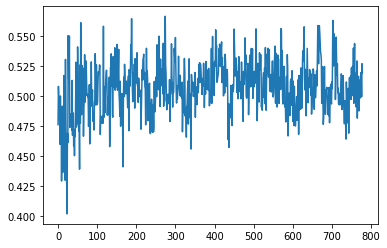

In [125]:
plt.plot(stats['lr'])

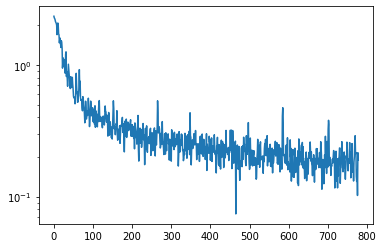

In [128]:
plt.plot(stats['loss'])
plt.yscale('log')

In [120]:
for (x, y) in life.data[0]:
    pred_model = np.argmax(life.model(x.to(life.device)).cpu().detach().numpy(), axis=1)
    out_true = y.cpu().numpy()
    acc = np.mean(pred_model == out_true)
    print(pred_model[:5], out_true[:5], acc)

[1 5 1 0 6] [1 5 1 0 6] 0.95703125
[0 9 7 8 5] [0 9 7 7 5] 0.943359375
[8 4 8 2 2] [8 4 8 2 7] 0.962890625
[6 2 8 0 8] [6 2 8 0 8] 0.9453125
[2 7 4 3 7] [2 7 4 3 7] 0.958984375
[1 1 9 6 4] [1 1 9 6 4] 0.955078125
[0 8 1 1 8] [0 8 1 1 8] 0.97265625
[7 9 5 7 1] [7 9 5 9 1] 0.927734375
[2 8 7 1 0] [2 8 7 1 0] 0.94140625
[8 3 5 6 4] [8 3 5 4 4] 0.947265625
[4 3 0 4 1] [4 3 0 4 1] 0.91796875
[9 6 1 6 0] [8 6 1 6 0] 0.955078125
[2 9 6 0 1] [2 9 6 0 1] 0.953125
[7 2 7 9 4] [7 2 7 7 4] 0.935546875
[6 3 7 1 7] [6 3 7 1 7] 0.947265625
[5 3 8 7 4] [5 3 8 7 4] 0.966796875
[6 1 2 0 4] [6 1 2 0 4] 0.9375
[3 9 6 8 4] [3 9 6 8 4] 0.943359375
[7 9 4 0 0] [7 9 4 5 0] 0.943359375
[2 1 3 0 6] [2 1 3 0 6] 0.9485294117647058


In [122]:
life.internals

{'optimizer': SGD (
 Parameter Group 0
     dampening: 0
     lr: 0.4998367130756378
     momentum: 0
     nesterov: False
     weight_decay: 0
 )}

In [55]:
# 0.93, 0.95 2048 bs
# 512 bs explode / 0.9

In [106]:
lr = torch.autograd.Variable(torch.zeros(1), requires_grad=True)
x = torch.autograd.Variable(torch.ones(10), requires_grad=True)

In [107]:
opt = torch.optim.SGD(params=[x, lr], lr=0)

In [108]:
for g in opt.param_groups:
    g['lr'] = lr.mean()

In [109]:
opt.zero_grad()

In [110]:
loss = torch.mean(torch.abs(x))

In [111]:
loss.backward()

In [112]:
opt.step()

In [113]:
lr.grad

In [114]:
x.grad

tensor([0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000,
        0.1000])

In [115]:
lr

tensor([0.], requires_grad=True)

In [ ]:
#loss = mse(model_{params}(x)-y)
# issue -- grad for lr is 0 because loss doesn't depend on it...